
# Market Risk metrics: VaR, SVaR for Fixed Income and Equities



**Value at Risk (VaR)** and **Stressed Value at Risk (SVaR)** are **market risk** metrics used to assess potential losses in investment portfolios. 

### 1. Value at Risk (VaR)

Value at Risk (VaR) is a statistical measure that estimates the maximum potential loss an investment or portfolio could incur over a specified time horizon at a given confidence level. For instance, a VaR of -0.10 at a 95% confidence level indicates a 5% chance that the portfolio could lose more than 10% of its value in a single day. VaR is widely utilized by risk managers to evaluate portfolio risk exposure and ensure adequate capital reserves are maintained.

### 2. Stressed Value at Risk (SVaR)

Stressed Value at Risk (SVaR) builds upon the concept of VaR by assessing potential losses under stressed market conditions. SVaR emphasizes extreme scenarios, such as financial crises or significant market downturns, to provide a more comprehensive view of risk. By incorporating stress testing methodologies, SVaR enables investors to understand how their portfolios might perform during adverse market conditions.



This Notebook illustrates the calculations of VaR and SVaR for Fixed Income and Equities, highlight their importance in risk management.





## 1. Value at Risk (VaR)

The code samples below demonstrate how to calculate historical VaR for equities and bonds:


1-day VaR at 95.0% confidence level: 1.03%


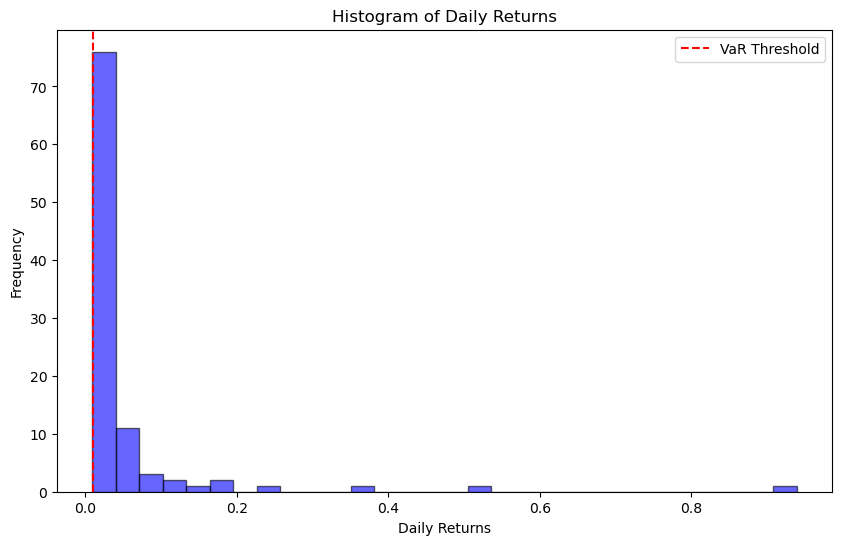

In [ ]:
#  Historical VaR for  equity

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate some sample historical price data (for demonstration purposes)
# In practice, you would load this data from a CSV or a financial data API
np.random.seed(42)  # For reproducibility
dates = pd.date_range(start='2022-01-01', periods=100)
prices = np.random.normal(loc=100, scale=10, size=len(dates)).cumsum()  # Simulated price data
price_data = pd.Series(prices, index=dates)

# Calculate daily returns
returns = price_data.pct_change().dropna()

# Calculate the VaR at the 95% confidence level
confidence_level = 0.95
var_threshold = np.percentile(returns, (1 - confidence_level) * 100)

# Print the VaR
print(f"1-day VaR at {confidence_level * 100}% confidence level: {var_threshold:.2%}")

# Optional: Plot the returns and the VaR threshold
plt.figure(figsize=(10, 6))
plt.hist(returns, bins=30, alpha=0.6, color='blue', edgecolor='black')
plt.axvline(var_threshold, color='red', linestyle='--', label='VaR Threshold')
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Value at Risk (VaR) for Fixed Income at 95.0% confidence level: -0.1146


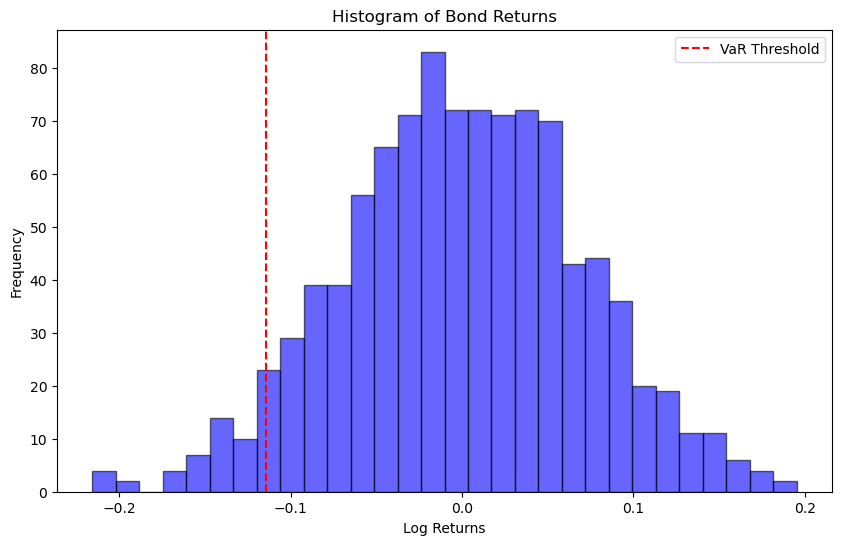

In [ ]:
#  Historical VaR for bonds

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# Simulate 1000 bond prices around $100
price_data = np.random.normal(100, 5, 1000)
price_data = np.clip(price_data, 0, None)  # Ensure no negative prices

# Create a DataFrame for better organization
price_df = pd.DataFrame(price_data, columns=['Price'])

# Calculate returns
price_df['Returns'] = np.log(price_df['Price'] / price_df['Price'].shift(1))
returns = price_df['Returns'].dropna()  # Drop NaN values from the first row

# Calculate VaR at 95% confidence level
confidence_level = 0.95
VaR = np.percentile(returns, (1 - confidence_level) * 100)  # 5th percentile of the returns distribution

# Print the VaR
print(f"Value at Risk (VaR) for Fixed Income at {confidence_level * 100}% confidence level: {VaR:.4f}")

# Optional: Plot the distribution of returns
plt.figure(figsize=(10, 6))
plt.hist(returns, bins=30, alpha=0.6, color='blue', edgecolor='black')
plt.axvline(VaR, color='red', linestyle='--', label='VaR Threshold')
plt.title('Histogram of Bond Returns')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()



### **Interpretation of Historical VaR**:

Value at Risk (VaR) is a statistical measure that quantifies the potential risk of loss on an investment or portfolio. It estimates the maximum expected loss over a specified time period at a given confidence level.

- **Negative Value Representation**:  
   VaR is typically expressed as a negative value to signify potential losses. For example, a VaR of -0.1146 indicates that there is a 5% probability that the portfolio could incur a loss exceeding 11.46% of its value over the specified time horizon (commonly one day).

- **Confidence Level**:  
   In this context, the VaR is calculated at a 95% confidence level. This implies that in 95% of scenarios, the portfolio is expected to lose less than 11.46%. Conversely, in the worst 5% of scenarios, the loss could surpass this threshold.

- **Practical Implications**:  
   If your portfolio is valued at $1,000,000, a VaR of -0.1146 suggests that there is a 5% chance the portfolio could lose more than $114,600 in a single day. This information is vital for risk management, as it enables investors and risk managers to gauge the potential downside of their investments.

- **Limitations of VaR**:  
   While VaR is a valuable risk assessment tool, it has its limitations. It does not account for the magnitude of losses that may occur beyond the VaR threshold (i.e., it does not capture tail risk). Furthermore, VaR relies on the assumption that historical price movements are indicative of future risks, which may not always hold true, particularly in volatile market conditions.



## Calculating VaR at Different Confidence Levels (e.g., 90%, 95%, 99%)

Calculating VaR at various confidence levels offers a more comprehensive perspective on the potential risks associated with an investment or portfolio:

In [3]:
# Define confidence levels
confidence_levels = [0.90, 0.95, 0.99]

# Calculate VaR for each confidence level
VaRs = {} 
for confidence_level in confidence_levels:
    VaR = np.percentile(returns, (1 - confidence_level) * 100)
    VaRs[confidence_level] = VaR

# Print VaR for each confidence level
for confidence_level, VaR in VaRs.items():
    print(f"VaR at {confidence_level * 100}% confidence level: {VaR:.4f}")


VaR at 90.0% confidence level: -0.0888
VaR at 95.0% confidence level: -0.1146
VaR at 99.0% confidence level: -0.1579


## Visualization

Below bar chart  displays the Value at Risk (VaR) at different confidence levels (90%, 95%, and 99%). Each bar represents the VaR value corresponding to a specific confidence level:

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

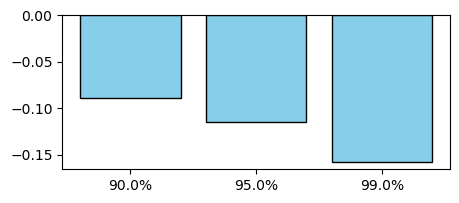

In [5]:
# Plotting the VaR values
plt.figure(figsize=(5, 2))
plt.bar([f"{level * 100}%" for level in confidence_levels], 
        list(VaRs.values()), 
        color='skyblue', 
        edgecolor='black')

plt.title


## Methodologies for calculating VaR:

In the previous code examples, I illustrated how to calculate historical VaR for bonds and equities. However, understanding the various methodologies for calculating VaR, and the differences in VaR between equities and bonds is essential for effective risk management is crucial for effectively managing market risk. 


#### **For Equities**:

1. **Historical Simulation**:  
   This method uses historical price data to simulate potential future losses. By analyzing past price movements, you can estimate the distribution of returns and calculate VaR based on the desired confidence level (e.g., 95% or 99%).

   - **Pros**: Simple to implement and does not assume a specific distribution of returns.  
   - **Cons**: Heavily relies on historical data, which may not accurately predict future risks, especially in volatile markets.

2. **Variance-Covariance Method**:  
   This approach assumes that returns are normally distributed and calculates VaR using the mean and standard deviation of historical returns. The formula for VaR is:
   \[
   \text{VaR} = \mu + z \cdot \sigma
   \]
   where \(\mu\) is the mean return, \(z\) is the z-score corresponding to the desired confidence level, and \(\sigma\) is the standard deviation of returns.

   - **Pros**: Quick to calculate and easy to understand.  
   - **Cons**: The normality assumption may not hold, particularly during periods of market stress.

3. **Monte Carlo Simulation**:  
   This method involves generating a large number of random price paths based on the statistical properties of the asset's returns. By simulating various scenarios, you can estimate potential losses and calculate VaR.

   - **Pros**: Flexible and can accommodate complex instruments and non-normal distributions.  
   - **Cons**: Computationally intensive and requires careful modeling of the underlying processes.

#### **For Fixed Income**:

1. **Present Value of Future Cash Flows**:  
   For fixed income securities, VaR can be calculated by assessing how changes in interest rates affect the present value of future cash flows. This involves discounting cash flows at different interest rate scenarios to determine potential price changes.

   - **Pros**: Directly relates to the cash flows of the bond and provides a clear picture of interest rate risk.  
   - **Cons**: Requires accurate modeling of interest rate movements and may be complex for non-linear instruments.

2. **Historical VaR**:  
   Similar to equities, historical VaR can be calculated for fixed income by analyzing past yield movements and their impact on bond prices.

   - **Pros**: Straightforward and based on actual market data.  
   - **Cons**: May not accurately capture future interest rate environments.

3. **Interest Rate Models**:  
   Models such as the Vasicek model or the Hull-White model can be used to simulate interest rate movements. These models help in understanding the dynamics of interest rates and can be used to calculate potential price changes in fixed income securities.

   - **Pros**: Provides a theoretical framework for interest rate movements and can capture mean reversion and volatility.  
   - **Cons**: Requires a deep understanding of the models and their parameters, and the assumptions may not always hold in practice.





## 2. Stressed Value at Risk (SVaR)


SVaR is an extension of VaR that assesses potential losses in a portfolio under stressed market conditions. 

While VaR estimates the maximum expected loss over a specified time horizon at a given confidence level based on historical data, SVaR focuses on extreme market scenarios that could lead to significant losses.


#### Key Features of SVaR:

- **Stress Testing**:  
   SVaR incorporates stress testing methodologies to simulate extreme market conditions, such as financial crises or significant economic downturns. This approach helps in understanding how a portfolio might perform under adverse conditions.

- **Historical Data**:  
   SVaR can be calculated using historical data from periods of market stress, allowing for a more realistic assessment of potential losses during turbulent times.

- **Regulatory Requirement**:  
   Financial institutions, particularly banks, may be required to calculate SVaR as part of their risk management framework to ensure they hold sufficient capital to cover potential losses during stressed conditions.

- **Confidence Levels**:  
   Similar to VaR, SVaR is typically calculated at various confidence levels (e.g., 95%, 99%) to provide insights into potential losses under different scenarios.


### Importance of SVaR
- SVaR provides insights into potential losses during extreme market events, helping financial institutions and investors prepare for adverse scenarios.
- It enhances risk management strategies by quantifying the impact of stress scenarios on portfolio performance.




### Calculation of SVaR

1. **Defining Stress Scenario**:
   - The focus is on understanding potential losses during extreme market conditions, which is essential for effective risk management.
   - SVaR is calculated by examining the worst historical returns, which helps in assessing the risk of significant losses.

2. **Defining Stressed Returns**:
   - The method involves using the quantile function to determine the 10th percentile of historical returns. This percentile indicates the threshold below which 10% of the returns fall, effectively capturing the worst-performing returns.
   - By identifying these stressed returns, the analysis can simulate how a portfolio might perform under adverse conditions, allowing for a more thorough risk assessment.


By defining stressed returns through historical data analysis, risk managers can better understand the vulnerabilities of their portfolios and implement strategies to mitigate potential losses during market downturns. This approach is vital for maintaining financial stability and making informed investment decisions.

Stressed Value at Risk (SVaR) at 95.0% confidence level: -0.0305


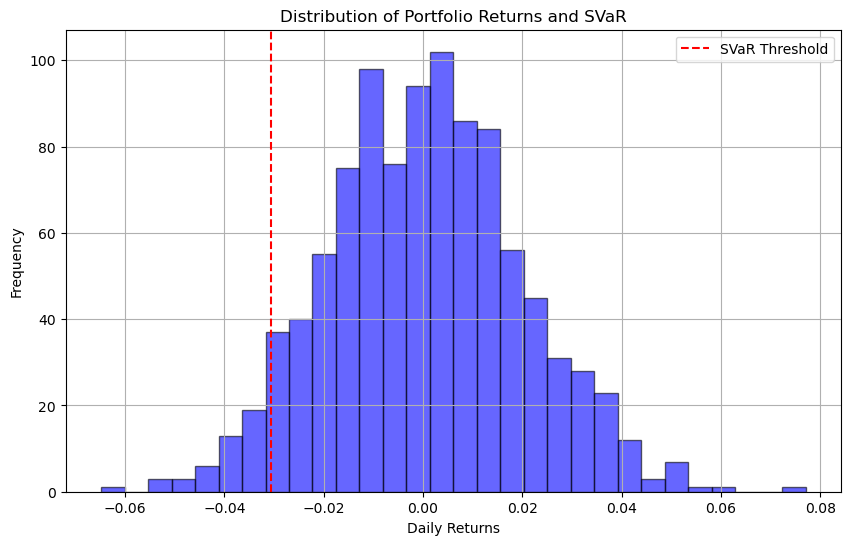

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate historical returns for a portfolio (e.g., 1000 days of returns)
np.random.seed(42)
returns = np.random.normal(0, 0.02, 1000)  # Simulated daily returns with mean 0 and std dev 0.02

# Create a DataFrame to hold the returns
returns_df = pd.DataFrame(returns, columns=['Returns'])

# Define a stressed scenario (e.g., using the worst 10% of historical returns)
stressed_returns = returns_df['Returns'].quantile(0.1)  # 10th percentile (worst 10% of returns)

# Calculate SVaR at 95% confidence level based on stressed returns
confidence_level = 0.95
SVaR = np.percentile(returns_df['Returns'], (1 - confidence_level) * 100)

# Print the SVaR
print(f"Stressed Value at Risk (SVaR) at {confidence_level * 100}% confidence level: {SVaR:.4f}")

# Optional: Visualize the distribution of returns and the SVaR threshold
plt.figure(figsize=(10, 6))
plt.hist(returns_df['Returns'], bins=30, alpha=0.6, color='blue', edgecolor='black')
plt.axvline(SVaR, color='red', linestyle='--', label='SVaR Threshold')
plt.title('Distribution of Portfolio Returns and SVaR')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()


### **Interpretation of a Stressed Value at Risk (SVaR) value**:

SVaR of -0.0305 at a 95.0% confidence level indicates a significant risk of loss in stressed market conditions, emphasizing the need for effective risk management strategies.

- **Confidence Level**:  
   The 95.0% confidence level indicates that we are 95% certain that the potential loss will not exceed the calculated SVaR value in stressed market conditions. In other words, there is a 5% chance that the loss could be greater than this amount.

- **Value Interpretation**:  
   An SVaR of -0.0305 means that, under stressed market conditions, there is a 5% probability that the portfolio could incur a loss greater than 3.05% of its value over the specified time horizon (typically one day).

- **Practical Implications**:  
   If the portfolio is valued at eg. $1,000,000, an SVaR of -0.0305 suggests that there is a 5% chance the portfolio could lose more than $30,500 in a single day during extreme market conditions. This information is crucial for risk management, as it helps investors and risk managers understand the potential downside of their investments in adverse scenarios.





### **Key Differences in calculating SVaR for Bonds vs  Equities**:

While the fundamental concept of calculating SVaR remains the same—assessing potential losses under stressed conditions—the specific methodologies, data, and risk factors involved differ between equities and bonds. Understanding these differences is crucial for accurately assessing the risk associated with fixed income portfolios.

- **Defining Stress Scenario**:
   - **Equities**: Stress scenario for equities typically extreme market downturns or specific events that impact stock prices.
   - **Bonds**: For bonds, stress scenario often involves significant changes in interest rates or credit spreads. The worst historical returns may be derived from periods of economic stress, such as financial crises, during which interest rates fluctuated dramatically.

- **Risk Factors**:
   - **Equities**: The primary risk factors for equities: market risk, sector risk, and company-specific risk.
   - **Bonds**: For bonds, the key risk factors that can significantly impact the valuation of bonds during stressed market conditions: interest rate risk, credit risk, and liquidity risk.



### **Risk Aseessment**:

The SVaR metric provides valuable insights into the potential risks associated with a portfolio during periods of market stress. It underscores the necessity of preparing for extreme market events and emphasizes the importance of maintaining sufficient capital reserves to cover potential losses. By understanding and utilizing SVaR, investors and risk managers can navigate adverse market conditions more effectively and make informed decisions to mitigate risk.